# **S12 T01: Aprenentatge Supervisat - Regressions**

In [2]:
# Imoporting packages
# ==============================================================================
import pandas as pd 
import datetime as dt
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import math

from sklearn import preprocessing as prp
from sklearn import model_selection as ms
from sklearn import linear_model as lin_mod
from sklearn import dummy
from sklearn import ensemble
from sklearn import tree
from sklearn import metrics
#import sklearn.pipeline as pipeline 

from lazypredict.Supervised import LazyRegressor

# Pandas Configuration
# ==============================================================================
pd.set_option('float_format', '{:.2f}'.format) # float numbers with 2 decimals
pd.set_option("display.max_columns", None) # Display all columns

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)




## **Nivell 1**

- Exercici 1

Crea almenys tres models de regressió diferents per intentar predir el millor possible l’endarreriment dels vols (ArrDelay) de DelayedFlights.csv.

In [3]:
flights_ready = pd.read_csv('../db/Flights/Flights_Ready.csv', index_col=0)
flights_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 7009727
Data columns (total 25 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Month              int64 
 1   DayofMonth         int64 
 2   DayOfWeek          int64 
 3   DepTime            int64 
 4   CRSDepTime         int64 
 5   ArrTime            int64 
 6   CRSArrTime         int64 
 7   UniqueCarrier      object
 8   FlightNum          int64 
 9   TailNum            object
 10  ActualElapsedTime  int64 
 11  CRSElapsedTime     int64 
 12  AirTime            int64 
 13  ArrDelay           int64 
 14  DepDelay           int64 
 15  Origin             object
 16  Dest               object
 17  Distance           int64 
 18  TaxiIn             int64 
 19  TaxiOut            int64 
 20  CarrierDelay       int64 
 21  WeatherDelay       int64 
 22  NASDelay           int64 
 23  SecurityDelay      int64 
 24  LateAircraftDelay  int64 
dtypes: int64(21), object(4)
memory usage: 382.5+ 

Drop TailNum and Flights num ja que son variables categóriques i transformarles en dummy values tindria un cost molt gran per la computació.

In [4]:
flights_ready.drop(axis=1, columns=['TailNum', 'FlightNum'], inplace=True)

encoder = prp.OrdinalEncoder()
flights_ready[['UniqueCarrier', 'Origin', 'Dest']]= encoder.fit_transform(flights_ready[['UniqueCarrier', 'Origin', 'Dest']])

In [5]:
flights_ready.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003,1955,2211,2225,17.00,128,150,116,-14,8,135.00,284.00,810,4,8,0,0,0,0,0
1,1,3,4,754,735,1002,1000,17.00,128,145,113,2,19,135.00,284.00,810,5,10,0,0,0,0,0
2,1,3,4,628,620,804,750,17.00,96,90,76,14,8,140.00,48.00,515,3,17,0,0,0,0,0
4,1,3,4,1829,1755,1959,1925,17.00,90,90,77,34,34,140.00,48.00,515,3,10,2,0,0,0,32
5,1,3,4,1940,1915,2121,2110,17.00,101,115,87,11,25,140.00,149.00,688,4,10,0,0,0,0,0


Making a random sample containing 3% of the Dataset.

In [6]:
flights_sample = flights_ready.sample(frac=0.03,  random_state = 42)
flights_sample.shape

(57851, 23)

## **Split the dataset into training/test**

In [7]:
X = flights_sample.drop('ArrDelay', axis=1)
y = flights_sample['ArrDelay']

X_train, X_test, y_train, y_test = ms.train_test_split(X,y, test_size = 0.25, random_state=42)

print(f"Train X:{X_train.shape}, Train y:{y_train.shape}\nTest X:{X_test.shape}, {y_test.shape}")


Train X:(43388, 22), Train y:(43388,)
Test X:(14463, 22), (14463,)


## **Appling Regression Models to the dataset**

In [10]:
# Dummy Regressor
# ============================================================================

dummy_reg = dummy.DummyClassifier(strategy='most_frequent')
dummy_reg.fit(X_train, y_train)
y_predict_dummy = dummy_reg.predict(X_test)

params =dummy_reg.get_params()
r_sq_dummy =(dummy_reg.score(X_train, y_train))
print(f"Parameters:\n{params}\nR^2:{r_sq_dummy}")

Parameters:
{'constant': None, 'random_state': None, 'strategy': 'most_frequent'}
R^2:0.019383239605420852


In [14]:
dummy_reg_mse = metrics.mean_squared_error(y_test, y_predict_dummy)
dummy_reg_rmse = math.sqrt(metrics.mean_squared_error(y_test, y_predict_dummy))
dummy_reg_mae = metrics.mean_absolute_error(y_test, y_predict_dummy)
dummy_reg_r2_score = metrics.r2_score(y_test, y_predict_dummy)
print("MSE: {:7f}".format(dummy_reg_mse))
print("RMSE: {:7f}".format(dummy_reg_rmse))
print("MAE: {:7f}".format(dummy_reg_mae))
print("R2_SCORE: {:7f}".format(dummy_reg_r2_score))

MSE: 3972.614741
RMSE: 63.028682
MAE: 36.285211
R2_SCORE: -0.317087


### <u>Linear Regression:<u>

In [16]:
lin_reg = lin_mod.LinearRegression(n_jobs=3).fit(X_train,y_train)
params = lin_reg.get_params()
r_sq = lin_reg.score(X_train, y_train)
print(f"Parameters:\n{params}\nR^2:{r_sq}")
print(lin_reg.coef_)
print(lin_reg.intercept_)

Parameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 3, 'normalize': False}
R^2:0.9999999927575033
[ 9.20394858e-06 -5.92717851e-07  1.62008106e-06  1.21724512e-06
 -1.48956834e-06 -7.14253926e-08  3.50410158e-07  7.46819102e-06
  7.50001264e-01 -1.00000212e+00  2.49999315e-01  1.00000030e+00
 -3.63436660e-07 -4.06852089e-08  2.38013671e-07  2.50000941e-01
  2.50001008e-01 -1.92181373e-06 -1.18596769e-06 -1.68174011e-06
 -1.41480363e-06 -9.71691690e-07]
-0.0001916704641899969


In [17]:
linreg_predict = lin_reg.predict(X_test)
linreg_mse = metrics.mean_squared_error(y_test, linreg_predict)
linreg_rmse = math.sqrt(metrics.mean_squared_error(y_test, linreg_predict))
linreg_mae = metrics.mean_absolute_error(y_test, linreg_predict)
linreg_r2_score = metrics.r2_score(y_test, linreg_predict)
print("MSE: {:7f}".format(linreg_mse))
print("RMSE: {:7f}".format(linreg_rmse))
print("MAE: {:7f}".format(linreg_mae))
print("R2_SCORE: {:7f}".format(linreg_r2_score))

MSE: 0.000069
RMSE: 0.008320
MAE: 0.000179
R2_SCORE: 1.000000


### Random Forest

In [18]:
rand_forest = ensemble.RandomForestRegressor(random_state=42, n_jobs=2).fit(X_train,y_train)

In [19]:
params = rand_forest.get_params()
r_sq = rand_forest.score(X_train, y_train)
print(f"Parameters:\n{params}\nR^2:{r_sq}")

Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 2, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R^2:0.9987162607613765


In [20]:
randforest_predict = rand_forest.predict(X_test)
randforest_mse = metrics.mean_squared_error(y_test, randforest_predict)
randforest_rmse = math.sqrt(metrics.mean_squared_error(y_test, randforest_predict))
randforest_mae = metrics.mean_absolute_error(y_test, randforest_predict)
# mape = metrics.mean_absolute_percentage_error(y_test, randforest_predict)
randforest_r2_score = metrics.r2_score(y_test, randforest_predict)
print("MSE: {:7f}".format(randforest_mse))
print("RMSE: {:7f}".format(randforest_rmse))
print("MAE: {:7f}".format(randforest_mae))
print("R2_SCORE: {:7f}".format(randforest_r2_score))

MSE: 25.406795
RMSE: 5.040515
MAE: 2.070870
R2_SCORE: 0.991577


### <u>LASSO Regression<u>

In [21]:
flights_ready.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [22]:
lasso = lin_mod.Lasso(random_state=42).fit(X_train,y_train)
params = lasso.get_params()
r_sq = lasso.score(X_train, y_train)
print(f"Parameters:\n{params}\nR^2:{r_sq}")
print(lasso.coef_)
print(lasso.intercept_)

Parameters:
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 42, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
R^2:0.9999850849887668
[-0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.29411566e-06
 -3.02362302e-05  9.29016498e-06  1.13092043e-05 -0.00000000e+00
  4.28357788e-01 -9.95715412e-01  5.65076160e-01  9.99566285e-01
 -0.00000000e+00 -1.29463105e-04  2.85950592e-04  5.31545827e-01
  5.64913495e-01  0.00000000e+00  0.00000000e+00  2.51527594e-03
  0.00000000e+00  5.81246275e-05]
0.3336563024935373


In [23]:
lasso_predict = lasso.predict(X_test)
lasso_mse = metrics.mean_squared_error(y_test, lasso_predict)
lasso_rmse = math.sqrt(metrics.mean_squared_error(y_test, lasso_predict))
lasso_mae = metrics.mean_absolute_error(y_test, lasso_predict)
lasso_r2_score = metrics.r2_score(y_test, lasso_predict)
print("MSE: {:7f}".format(lasso_mse))
print("RMSE: {:7f}".format(lasso_rmse))
print("MAE: {:7f}".format(lasso_mae))
print("R2_SCORE: {:7f}".format(lasso_r2_score))


MSE: 0.049808
RMSE: 0.223176
MAE: 0.140111
R2_SCORE: 0.999983


In [24]:
flights_sample2 = flights_ready.sample(frac=0.003,  random_state = 42)
flights_sample2.shape
X2 = flights_sample2.drop('ArrDelay', axis=1)
y2 = flights_sample2['ArrDelay']

X_train2, X_test2, y_train2, y_test2 = ms.train_test_split(X2,y2, test_size = 0.25, random_state=42)

print(f"Train X:{X_train2.shape}, Train y:{y_train2.shape}\nTest X:{X_test2.shape}, {y_test2.shape}")

Train X:(4338, 22), Train y:(4338,)
Test X:(1447, 22), (1447,)


In [25]:

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, prediction = reg.fit(X_train2, X_test2, y_train2, y_test2)
lazy_df = pd.DataFrame(models)
lazy_df.sort_values(["R-Squared", "Time Taken"], ascending=[False, True])


 21%|██▏       | 9/42 [00:03<00:15,  2.13it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 69%|██████▉   | 29/42 [00:16<00:07,  1.74it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


100%|██████████| 42/42 [00:22<00:00,  1.86it/s]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LinearRegression,1.00,1.00,0.00,0.02
LassoLarsIC,1.00,1.00,0.00,0.02
RANSACRegressor,1.00,1.00,0.00,0.02
Lars,1.00,1.00,0.00,0.02
TransformedTargetRegressor,1.00,1.00,0.00,0.03
LarsCV,1.00,1.00,0.00,0.05
LassoLarsCV,1.00,1.00,0.00,0.05
LinearSVR,1.00,1.00,0.00,0.13
BayesianRidge,1.00,1.00,0.01,0.06


- Exercici 2

Compara’ls en base al MSE i al R2 .


In [36]:


metrics = [[dummy_reg_r2_score, dummy_reg_mse, dummy_reg_rmse, dummy_reg_mae,lazy_df.loc["DummyRegressor","R-Squared"],lazy_df.loc["DummyRegressor","RMSE"]],
          [linreg_r2_score, linreg_mse, linreg_rmse, linreg_mae,lazy_df.loc["LinearRegression","R-Squared"],lazy_df.loc["LinearRegression","RMSE"]],
          [lasso_r2_score, lasso_mse, lasso_rmse, lasso_mae, lazy_df.loc["Lasso","R-Squared"],lazy_df.loc["Lasso","RMSE"]],
          [randforest_r2_score, randforest_mse, randforest_rmse, randforest_mae,lazy_df.loc["RandomForestRegressor","R-Squared"],lazy_df.loc["RandomForestRegressor","RMSE"]]]

metrics = pd.DataFrame(metrics, index=["Dummy", "Lasso", "Random Forest", "Linear Regression"], columns=["R2_Score","MSE", "RMSE", "MAE", "Lazy_R2", "Lazy_RMSE "])
metrics


,R2_Score,MSE,RMSE,MAE,Lazy_R2,Lazy_RMSE
Dummy,-0.32,3972.61,63.03,36.29,-0.00,53.76
Lasso,1.00,0.00,0.01,0.00,1.00,0.00
Random Forest,1.00,0.05,0.22,0.14,0.99,6.35
Linear Regression,0.99,25.41,5.04,2.07,0.98,7.69


[(-0.5, 1.0)]

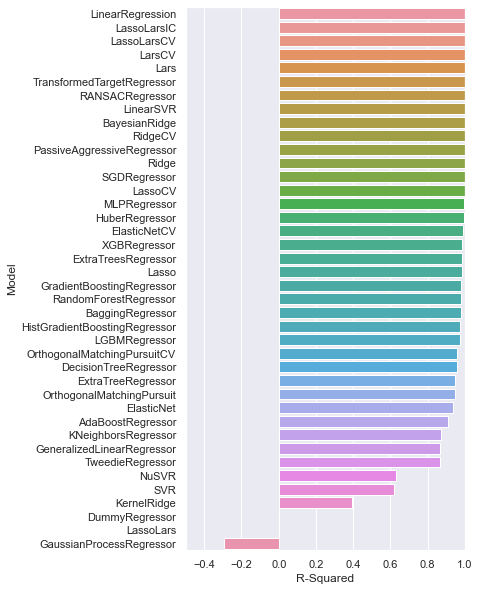

In [27]:
# Display  Predictions Graph with LazzyRegressor
# ============================================================================

plt.figure(figsize=(5, 10))
ax = sns.barplot(y=lazy_df.index, x="R-Squared", data=lazy_df)
ax.set(xlim=(-0.5, 1))

- Exercici 3

Entrena’ls utilitzant els diferents paràmetres que admeten.

Per realitzar aquesta part utilitzarem el métode [Ranomized Search CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) el  cual optimizta el parametres realitzant un Cross Validation amb els diferents valors indicats per a cada parámetre.

### <u>Linear Regression<u>

In [28]:
linreg_distributions = dict(fit_intercept=[True, False], normalize=[True,False])
linreg_RSCV = ms.RandomizedSearchCV(lin_reg, linreg_distributions, n_iter=10, n_jobs=3, cv=10, random_state=42, return_train_score=False, refit=True)
linreg_RSCV_search = linreg_RSCV.fit(X_train,y_train)

In [29]:
print(linreg_RSCV_search.best_estimator_)
print(f'BEST:\nScore: {linreg_RSCV_search.best_score_}\nParams: {linreg_RSCV_search.best_params_}\nIndex: {linreg_RSCV_search.best_index_}')

linreg_RSCV_results = pd.DataFrame(linreg_RSCV_search.cv_results_)
linreg_RSCV_results

LinearRegression(fit_intercept=False, n_jobs=3, normalize=True)
BEST:
Score: 0.9999999929870846
Params: {'normalize': True, 'fit_intercept': False}
Index: 2


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.08,0.01,0.00,0.00,True,True,"{'normalize': True, 'fit_intercept': True}",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3
1,0.08,0.00,0.01,0.00,False,True,"{'normalize': False, 'fit_intercept': True}",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,3
2,0.08,0.01,0.01,0.00,True,False,"{'normalize': True, 'fit_intercept': False}",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1
3,0.08,0.00,0.01,0.00,False,False,"{'normalize': False, 'fit_intercept': False}",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1


In [30]:
# linreg_predict = lin_reg.predict(X_test)
# linreg_mse = metrics.mean_squared_error(y_test, linreg_predict)
# linreg_rmse = math.sqrt(metrics.mean_squared_error(y_test, linreg_predict))
# linreg_mae = metrics.mean_absolute_error(y_test, linreg_predict)
# linreg_r2_score = metrics.r2_score(y_test, linreg_predict)
# print("MSE: {:7f}".format(linreg_mse))
# print("RMSE: {:7f}".format(linreg_rmse))
# print("MAE: {:7f}".format(linreg_mae))
# print("R2_SCORE: {:7f}".format(linreg_r2_score))

### Random Forest

In [31]:
des_tree = tree.DecisionTreeRegressor(random_state=42)
print(f"Parameters:\n{des_tree.get_params()}\nR^2:{r_sq}")

Parameters:
{'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 42, 'splitter': 'best'}
R^2:0.9999850849887668


In [32]:
destree_distributions = dict(criterion=["mse", "mae"], 
                             max_depth=[5, 10, None])
randfor_RSCV = ms.RandomizedSearchCV(des_tree, destree_distributions, n_iter=10, n_jobs=3, cv=3, random_state=42, return_train_score=False, refit=True)
randfor_RSCV_search = randfor_RSCV.fit(X_train,y_train)

KeyboardInterrupt: 

In [1]:
print(randfor_RSCV_search.best_estimator_)
print(f'BEST:\nScore: {randfor_RSCV_search.best_score_}\nParams: {randfor_RSCV_search.best_params_}\nIndex: {randfor_RSCV_search.best_index_}')

randfor_RSCV_results = pd.DataFrame(randfor_RSCV_search.cv_results_)
randfor_RSCV_results.sort_values(columns=['rank_test_score'])

NameError: name 'randfor_RSCV_search' is not defined

In [ ]:
rand_forest = ensemble.RandomForestRegressor(random_state=42, n_jobs=3)
print(f"Parameters:\n{rand_forest.get_params()}\nR^2:{r_sq}")

Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 3, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
R^2:0.9969971809507817


In [ ]:
randfor_distributions = dict(n_estimators=[5, 10, 100],
                             criterion=["mse", "mae"], 
                             max_depth=[10, 15, 20, 50, None],
                             bootstrap=[True, False])
randfor_RSCV = ms.RandomizedSearchCV(rand_forest, randfor_distributions, n_iter=100, n_jobs=3, cv=3, random_state=42, return_train_score=False, refit=True)
randfor_RSCV_search = randfor_RSCV.fit(X_train2,y_train2)

In [ ]:
print(randfor_RSCV_search.best_estimator_)
print(f'BEST:\nScore: {randfor_RSCV_search.best_score_}\nParams: {randfor_RSCV_search.best_params_}\nIndex: {randfor_RSCV_search.best_index_}')

randfor_RSCV_results = pd.DataFrame(randfor_RSCV_search.cv_results_)
randfor_RSCV_results

RandomForestRegressor(max_depth=50, n_jobs=2, random_state=42)
BEST:
Score: 0.9136447565991688
Params: {'n_estimators': 100, 'max_depth': 50, 'criterion': 'mse', 'bootstrap': True}
Index: 11


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.10,0.00,0.03,0.03,5,10,mse,True,"{'n_estimators': 5, 'max_depth': 10, 'criterio...",0.95,0.81,0.97,0.91,0.07,16
1,0.22,0.03,0.01,0.00,10,10,mse,True,"{'n_estimators': 10, 'max_depth': 10, 'criteri...",0.96,0.80,0.97,0.91,0.08,15
2,2.54,0.03,0.04,0.00,100,10,mse,True,"{'n_estimators': 100, 'max_depth': 10, 'criter...",0.96,0.81,0.97,0.91,0.08,5
3,0.13,0.01,0.01,0.00,5,15,mse,True,"{'n_estimators': 5, 'max_depth': 15, 'criterio...",0.95,0.81,0.97,0.91,0.07,14
4,0.30,0.04,0.01,0.00,10,15,mse,True,"{'n_estimators': 10, 'max_depth': 15, 'criteri...",0.95,0.80,0.97,0.91,0.08,10
5,3.03,0.07,0.04,0.00,100,15,mse,True,"{'n_estimators': 100, 'max_depth': 15, 'criter...",0.96,0.81,0.98,0.91,0.08,4
6,0.20,0.04,0.01,0.00,5,20,mse,True,"{'n_estimators': 5, 'max_depth': 20, 'criterio...",0.95,0.80,0.97,0.91,0.08,17
7,0.35,0.11,0.01,0.00,10,20,mse,True,"{'n_estimators': 10, 'max_depth': 20, 'criteri...",0.95,0.80,0.98,0.91,0.08,11
8,3.38,0.01,0.04,0.00,100,20,mse,True,"{'n_estimators': 100, 'max_depth': 20, 'criter...",0.96,0.81,0.98,0.91,0.08,3
9,0.17,0.04,0.01,0.00,5,50,mse,True,"{'n_estimators': 5, 'max_depth': 50, 'criterio...",0.95,0.80,0.97,0.91,0.07,26


### <u>LASSO Regression<u>

In [ ]:
lasso = lin_mod.Lasso()
params = lasso.get_params()
print(f"Parameters:\n{params}\nR^2:{r_sq}")

Parameters:
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}
R^2:0.9969971809507817


In [ ]:
lasso_distributions = dict(alpha=[1,0.5,0.25],
                             fit_intercept=[True,False], 
                             normalize=[True, False],
                             max_iter=[100, 500, 1000], 
                             warm_start=[True, False])
lasso_RSCV = ms.RandomizedSearchCV(lasso, lasso_distributions, n_iter=140, n_jobs=3, cv=10, random_state=42, return_train_score=False, refit=True)
lasso_RSCV_search = lasso_RSCV.fit(X_train,y_train)

In [ ]:
print(lasso_RSCV_search.best_estimator_)
print(f'BEST:\nScore: {lasso_RSCV_search.best_score_}\nParams: {lasso_RSCV_search.best_params_}\nIndex: {lasso_RSCV_search.best_index_}')

lasso_RSCV_results = pd.DataFrame(lasso_RSCV_search.cv_results_)
lasso_RSCV_results

Lasso(alpha=0.25, warm_start=True)
BEST:
Score: 0.9999955418468426
Params: {'warm_start': True, 'normalize': False, 'max_iter': 1000, 'fit_intercept': True, 'alpha': 0.25}
Index: 58


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_warm_start,param_normalize,param_max_iter,param_fit_intercept,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.08,0.03,0.01,0.01,True,True,100,True,1,"{'warm_start': True, 'normalize': True, 'max_i...",-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,61
1,0.05,0.01,0.01,0.00,False,True,100,True,1,"{'warm_start': False, 'normalize': True, 'max_...",-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,61
2,0.40,0.07,0.01,0.00,True,False,100,True,1,"{'warm_start': True, 'normalize': False, 'max_...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,29
3,0.38,0.08,0.01,0.00,False,False,100,True,1,"{'warm_start': False, 'normalize': False, 'max...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,29
4,0.08,0.02,0.01,0.01,True,True,500,True,1,"{'warm_start': True, 'normalize': True, 'max_i...",-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.65,0.06,0.01,0.00,False,False,500,False,0.25,"{'warm_start': False, 'normalize': False, 'max...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,39
68,3.48,0.20,0.01,0.00,True,True,1000,False,0.25,"{'warm_start': True, 'normalize': True, 'max_i...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,21
69,3.62,0.37,0.01,0.00,False,True,1000,False,0.25,"{'warm_start': False, 'normalize': True, 'max_...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,21
70,3.96,0.34,0.01,0.00,True,False,1000,False,0.25,"{'warm_start': True, 'normalize': False, 'max_...",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,21


- Exercici 4

Compara el seu rendiment utilitzant l’aproximació traint/test o utilitzant totes les dades (validació interna)

In [ ]:
cross_val_rf = ms.cross_validate(rand_forest, X2, y2, cv=10, n_jobs=3, scoring={'R^2':'r2','MSE':'neg_mean_squared_error', 'RMSE':'neg_root_mean_squared_error', 'MAE':'neg_mean_absolute_error','EXP_VAR':'explained_variance'} ,return_estimator=False, return_train_score=False)
cv_rf = pd.DataFrame(cross_val_rf)
cv_rf

,fit_time,score_time,test_R^2,test_MSE,test_RMSE,test_MAE,test_EXP_VAR
0,5.95,0.04,0.87,-737.40,-27.16,-6.06,0.87
1,5.98,0.04,0.98,-67.38,-8.21,-4.35,0.98
2,6.01,0.04,0.97,-74.14,-8.61,-4.55,0.97
3,5.82,0.04,0.98,-53.85,-7.34,-4.07,0.98
4,5.81,0.05,0.98,-45.56,-6.75,-3.83,0.98
5,5.87,0.03,0.97,-73.72,-8.59,-4.01,0.97
6,5.81,0.04,0.98,-78.24,-8.85,-5.11,0.98
7,5.86,0.04,0.98,-48.66,-6.98,-3.93,0.98
8,5.85,0.03,0.98,-47.44,-6.89,-3.97,0.98
9,2.20,0.03,0.98,-55.54,-7.45,-4.34,0.98


In [ ]:
data = [[X2,y2],[X_train2,y_train2],[X_test2,y_test2]]
for x,y in data:
    r_sq = rand_forest.score(x, y)
    print(r_sq)

print(f'CV r^2 mean: {cv_rf["test_R^2"].mean()}')

0.9962309388469085
0.9959673848521016
0.9971089062198532
CV r^2 mean: 0.9674188538699804


## **Nivell 2**



- Exercici 5

Realitza algun procés d’enginyeria de variables per millorar-ne la predicció

## **Nivell 3**


- Exercici 6

No utilitzis la variable **DepDelay** a l’hora de fer prediccions

In [ ]:
# Making a correlation matrix of the attributes to see the correlation with Dep Delay and Arr Delay (target)
flights_corr = flights_sample.corr(method='pearson')

Text(0.5, 0.98, 'Correlation Matrix')

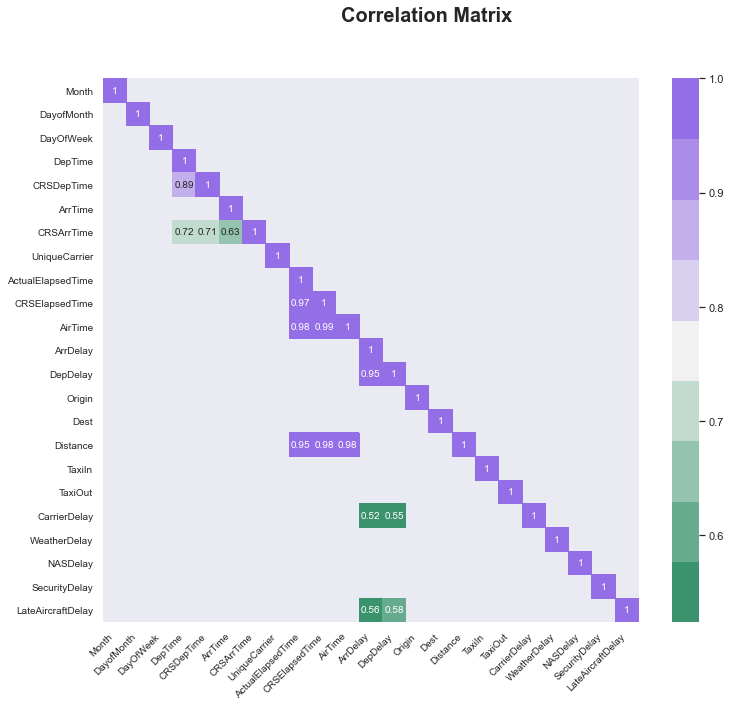

In [ ]:
# Heatmap matrix of correlations
# ==============================================================================
# Getting the Upper Triangle of the co-relation matrix
high_corr = flights_corr[(flights_corr >= 0.7) | (flights_corr<=-0.7)] 
corr_matrix = np.triu(high_corr, k=1) # This will be applied as a mask
sns.heatmap(high_corr, annot=True, mask=corr_matrix, cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), annot_kws = {"size": 10})

# Setting the plotting parameters
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, horizontalalignment = 'right')
ax.tick_params(labelsize = 10)
fig.suptitle('Correlation Matrix', fontsize = 20, fontweight = "bold")

In [ ]:
# Showing the weight of every attribute on the LASSO and Linear Regression
# ==============================================================================

pd.set_option('float_format', '{:.5f}'.format) # Setting pandas to show float numbers with 5 decimals

parameters = pd.DataFrame(data=[lasso.coef_, lin_reg.coef_],columns=X_train.columns, index=["LASSO", "LIN_REG"])
srtd = parameters.sort_values(by=["LASSO"], axis=1, ascending=False)
srtd

,DepDelay,AirTime,TaxiOut,TaxiIn,ActualElapsedTime,NASDelay,Distance,LateAircraftDelay,CRSArrTime,ArrTime,DepTime,UniqueCarrier,DayofMonth,Origin,CarrierDelay,WeatherDelay,DayOfWeek,SecurityDelay,Month,CRSDepTime,Dest,CRSElapsedTime
LASSO,0.99957,0.56508,0.56491,0.53155,0.42836,0.00252,0.00029,0.00006,0.00001,0.00001,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00003,-0.00013,-0.99572
LIN_REG,1.00000,0.25000,0.25000,0.25000,0.75000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00001,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00001,-0.00000,-0.00000,-1.00000


<AxesSubplot:>

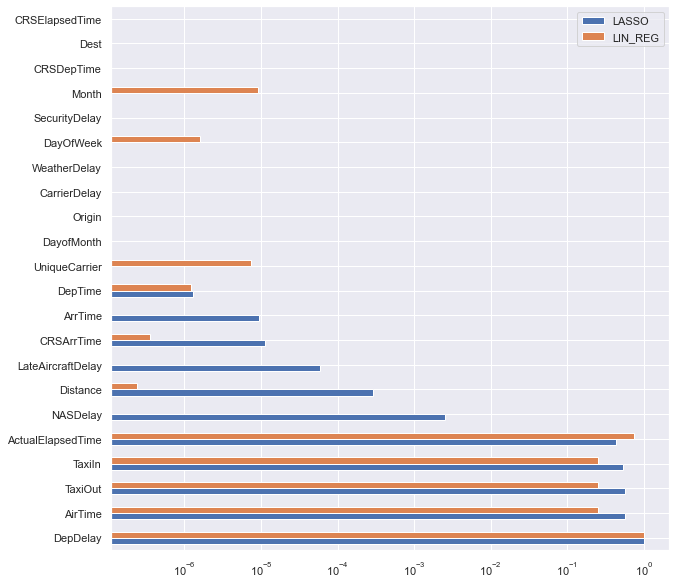

In [ ]:
# Plotting the values on a logaritmic scale to trully apreciate the differences between each param. 
srtd.plot(kind='barh', subplots=False, figsize=(10,10),logx=True)

As it can be seen on the correlation matrix and in attributes weight on linnear and LASSO Regresions te DepDelay Attribue is higlly correlated to the ArrDelay(target) attribute. This is logic as a Departure delay means that the plane will accumulate this delay to the target attribute. For example if a plane departures with 2h DepDelay we can easily deduce that the plane will arribe with a minimum delay arround 2h (even if it can be slighlty compensated during Air Time increasing velocity or with favorable wind currents).

This fenomenon explain the good results of our primal models. As the models are quite accurate, deleting the DepDelay Attribute will be more challenging in order to perform Feature Engineering to improve our prediction models.  

In [ ]:
X_train_mod = X_train.drop(axis=1, columns=['DepDelay'], inplace=False)
X_test_mod = X_train.drop(axis=1, columns=['DepDelay'], inplace=False)
X_train2_mod = X_train2.drop(axis=1, columns=['DepDelay'], inplace=False)
X_test2_mod = X_train2.drop(axis=1, columns=['DepDelay'], inplace=False)

In [ ]:
X_test2_mod

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2783969,5,12,1,701,650,854,840,11.00000,173,170,154,224.00000,81.00000,1068,5,14,0,0,0,0,0
2764466,5,19,1,759,739,850,830,10.00000,51,51,34,129.00000,145.00000,216,5,12,0,0,0,0,20
6800212,12,17,3,1443,1435,1633,1600,9.00000,110,85,75,238.00000,18.00000,356,8,27,0,0,25,0,8
4431449,8,17,7,1157,1131,1230,1212,14.00000,33,41,13,157.00000,214.00000,49,3,17,0,0,0,0,18
6029335,11,30,7,943,935,1102,1055,17.00000,79,80,65,209.00000,268.00000,389,5,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3998419,7,20,7,2209,2058,2252,2140,10.00000,43,42,25,152.00000,129.00000,163,8,10,1,0,0,0,71
6513913,12,18,4,1936,1930,2029,2030,17.00000,53,60,44,130.00000,76.00000,239,5,4,0,0,0,0,0
3141701,6,23,1,1938,1900,2134,2046,19.00000,116,106,77,87.00000,63.00000,500,19,20,48,0,0,0,0
1241232,3,22,6,1626,1600,1812,1745,17.00000,166,165,147,285.00000,179.00000,997,2,17,15,0,1,0,11


In [ ]:
print(X_train_mod.shape,
X_test_mod.shape,
X_train2_mod.shape,
X_test2_mod.shape)

(43388, 21) (43388, 21) (4338, 21) (4338, 21)


In [ ]:
reg_mod = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models2, prediction2 = reg_mod.fit(X_train2_mod, X_test2_mod, y_train2, y_test2)
lazy_df_mod = pd.DataFrame(models2)
lazy_df_mod.sort_values(["R-Squared", "Time Taken"], ascending=[False, True])

  2%|▏         | 1/42 [00:00<00:14,  2.79it/s]

AdaBoostRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 10%|▉         | 4/42 [00:01<00:08,  4.45it/s]

BaggingRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
BayesianRidge model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
DecisionTreeRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 14%|█▍        | 6/42 [00:01<00:05,  6.91it/s]

DummyRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
ElasticNet model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 19%|█▉        | 8/42 [00:01<00:04,  7.13it/s]

ElasticNetCV model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
ExtraTreeRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 21%|██▏       | 9/42 [00:03<00:20,  1.60it/s]

ExtraTreesRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [00:08<00:42,  1.38s/it]

GaussianProcessRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
GeneralizedLinearRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 31%|███       | 13/42 [00:10<00:31,  1.10s/it]

GradientBoostingRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 33%|███▎      | 14/42 [00:11<00:33,  1.21s/it]

HistGradientBoostingRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 36%|███▌      | 15/42 [00:12<00:27,  1.03s/it]

HuberRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 38%|███▊      | 16/42 [00:13<00:26,  1.03s/it]

KNeighborsRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 45%|████▌     | 19/42 [00:15<00:18,  1.22it/s]

KernelRidge model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
Lars model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
LarsCV model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 50%|█████     | 21/42 [00:15<00:11,  1.84it/s]

Lasso model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
LassoCV model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
LassoLars model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 57%|█████▋    | 24/42 [00:16<00:05,  3.07it/s]

LassoLarsCV model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
LassoLarsIC model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
LinearRegression model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 62%|██████▏   | 26/42 [00:16<00:03,  4.32it/s]

LinearSVR model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
MLPRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 79%|███████▊  | 33/42 [00:22<00:04,  1.80it/s]

NuSVR model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
OrthogonalMatchingPursuit model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
OrthogonalMatchingPursuitCV model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
PassiveAggressiveRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution
RANSACRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 83%|████████▎ | 35/42 [00:26<00:06,  1.05it/s]

RandomForestRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
Ridge model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
RidgeCV model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
SGDRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 90%|█████████ | 38/42 [00:28<00:03,  1.21it/s]

SVR model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
TransformedTargetRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]
TweedieRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


 98%|█████████▊| 41/42 [00:29<00:00,  1.64it/s]

XGBRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


100%|██████████| 42/42 [00:29<00:00,  1.43it/s]

LGBMRegressor model failed to execute
Found input variables with inconsistent numbers of samples: [1447, 4338]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


In [ ]:
# los tipos de score que se pueden obtener de scikit.meetrics()
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])